MIS325 HW1 IBRAHIM AYDIN
TASK1.1

In [1]:
# Task 1: Simulate Missing Data
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Introduce missing values into the dataset (10% missing data in 'mean radius' and 'mean texture')
X.loc[X.sample(frac=0.1).index, 'mean radius'] = np.nan
X.loc[X.sample(frac=0.1).index, 'mean texture'] = np.nan

# Task 1.1: Display the first few rows to observe missing values
print("Dataset with missing values:\n", X.head())

Dataset with missing values:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2          NaN         21.25          130.00     1203.0          0.10960   
3        11.42           NaN           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  w

TASK1.2

In [2]:
# Task 1.2: Impute Missing Values
# Initialize the SimpleImputer with the strategy of replacing missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the dataset
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Show the imputed dataset
print("\nDataset after imputing missing values:\n", X_imputed.head())


Dataset after imputing missing values:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0    17.990000     10.380000          122.80     1001.0          0.11840   
1    20.570000     17.770000          132.90     1326.0          0.08474   
2    14.046654     21.250000          130.00     1203.0          0.10960   
3    11.420000     19.362246           77.58      386.1          0.14250   
4    20.290000     14.340000          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst

TASK2


In [3]:
from sklearn.preprocessing import StandardScaler

# Task 2: Standardization
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_standardized = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# Show standardized data
print("\nStandardized data:\n", X_standardized.head())



Standardized data:
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0  1.183629e+00 -2.201437e+00        1.269934   0.984375         1.568466   
1  1.958038e+00 -3.902397e-01        1.685955   1.908708        -0.826962   
2 -4.798697e-15  4.626649e-01        1.566503   1.558884         0.942210   
3 -7.884126e-01 -5.224355e-15       -0.592687  -0.764464         3.283553   
4  1.873993e+00 -1.230890e+00        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  wors

TASK3

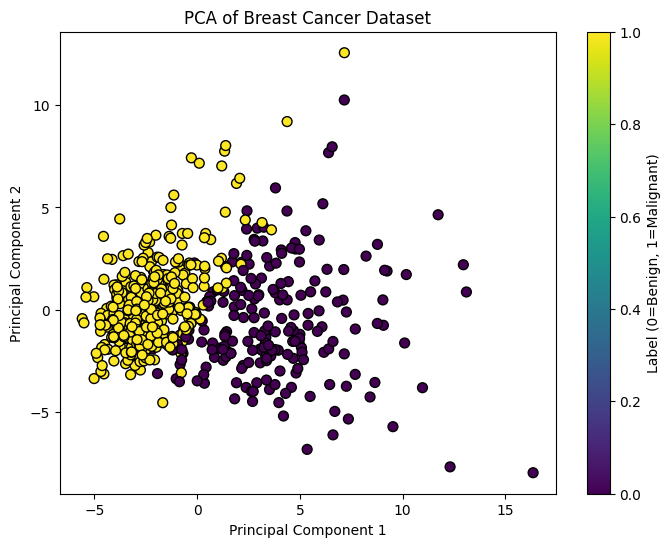

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Task 3: PCA
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the standardized data
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Label (0=Benign, 1=Malignant)')
plt.show()


TASK4

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif

# Task 4: Feature Selection using SelectKBest
# Initialize SelectKBest with ANOVA F-statistic and select the top 5 features
selector = SelectKBest(score_func=f_classif, k=5)

# Fit the selector to the data and transform it
X_selected = selector.fit_transform(X_standardized, y)

# Get the names of the selected features
selected_features = X_standardized.columns[selector.get_support(indices=True)]
print("Top 5 selected features based on ANOVA F-statistics:\n", selected_features.tolist())


Top 5 selected features based on ANOVA F-statistics:
 ['mean perimeter', 'mean concave points', 'worst radius', 'worst perimeter', 'worst concave points']


TASK5

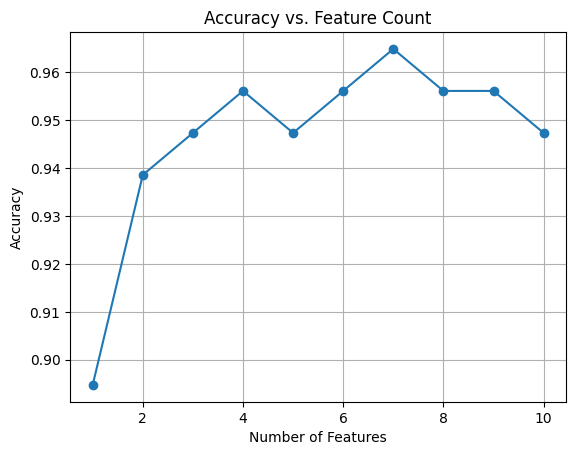

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Function to test different numbers of features
def evaluate_features(X, y, max_features=10):
    results = []

    for k in range(1, max_features + 1):
        # Select top k features
        X_k_best = SelectKBest(f_classif, k=k).fit_transform(X, y)

        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_k_best, y, test_size=0.2, random_state=42)

        # Train model and get accuracy
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, model.predict(X_test))

        # Store results
        results.append((k, accuracy))

    return results

# Run and plot the results
results = evaluate_features(X_standardized, y, max_features=10)
feature_counts, accuracies = zip(*results)

plt.plot(feature_counts, accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Feature Count')
plt.grid()
plt.show()


TASK6

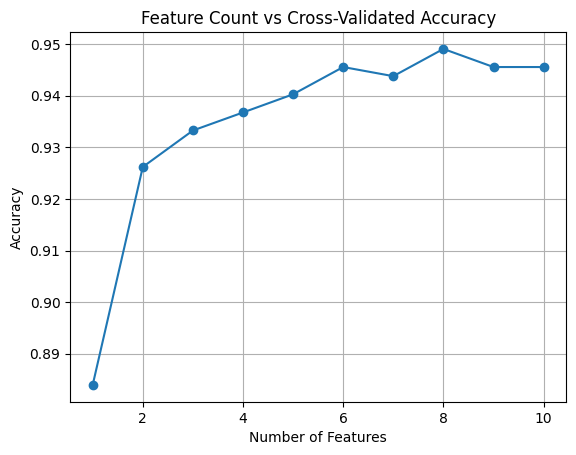

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Function to test different numbers of features with cross-validation
def evaluate_features_auto(X, y, max_features=10, model=None):
    model = model or RandomForestClassifier(random_state=42)
    results = {}

    for k in range(1, max_features + 1):
        # Select top k features and cross-validate
        X_k_best = SelectKBest(f_classif, k=k).fit_transform(X, y)
        scores = cross_val_score(model, X_k_best, y, cv=5, scoring='accuracy')
        results[k] = scores.mean()

    return results

# Run and plot the results
results = evaluate_features_auto(X_standardized, y, max_features=10)
feature_counts, accuracies = zip(*results.items())

plt.plot(feature_counts, accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Feature Count vs Cross-Validated Accuracy')
plt.grid()
plt.show()
